# Exploring the Allen Brain SDK
---

This is a guide notebook to explore and download the anatomical data from the Allen Brain Institute SDK.


### Installation:
You can install the SDK in a python (3.7) environment by using:
    
    pip install allensdk

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

## Constructing a StructureTree

A StructureTree object is a wrapper around a structure graph - a list of dictionaries documenting brain structures and their containment relationships. To build a structure tree, you will first need to obtain a structure graph. The `ReferenceSpaceCache` takes care of that for you.

For a list of atlases and corresponding structure graph ids, see [here](http://help.brain-map.org/display/api/Atlas+Drawings+and+Ontologies).

In [2]:
from allensdk.core.reference_space_cache import ReferenceSpaceCache

# -------------------------------------------
reference_space_key = 'annotation/ccf_2017'
resolution = 25
# -------------------------------------------

# Create a reference space object
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest='manifest.json')
# ID 1 is the adult mouse structure graph
tree = rspc.get_structure_tree(structure_graph_id=1) 

The fields contained in a StructureTree are:
    
* **acronym**: a shortened name for the structure
* **rgb_triplet**: each structure is assigned a consistent color for visualizations
* **graph_id**: the structure graph to which this structure belongs
* **graph_order**: each structure is assigned a consistent position in the flattened graph
* **id**: a unique integer identifier
* **name**: the full name of the structure
* **structure_id_path**: traces a path from the root node (id: 997) of the tree to this structure
* **structure_set_ids**: the structure belongs to these predefined groups

## Exploring structure sets

As a convenience, structures are grouped in to named collections called structure sets.  
These sets can be used to quickly gather a useful subset of structures from the tree. The criteria used to define structure sets are eclectic.

A structure set might list:

* structures that were used in a particular project.
* structures that coarsely partition the brain.
* structures that bear functional similarity.
* something else entirely. 

To see only structure sets relevant to the adult mouse brain, use the StructureTree and the Ontologies API:

In [3]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = tree.get_structure_sets()
# query the API for information on those structure sets
s = pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

# Add the number of structures contained in that specific set to the dataframe
numel = []
for sId in s['id']:
    n = len(tree.get_structures_by_set_id([sId]))
    numel.append(n)
s['structContained'] = numel

# Display the dataframe of structure sets
s


,description,id,name,structContained
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5,43
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b,43
2,Summary structures of the cerebellum,688152368,Cerebellum,18
3,List of structures for ABA Differential Search,12,ABA - Differential Search,843
4,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search,840
5,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh,840
6,Summary structures of the midbrain,688152365,Midbrain,39
7,Summary structures of the medulla,688152367,Medulla,45
8,Summary structures of the striatum,688152361,Striatum,14
9,Structures representing subdivisions of the mo...,687527945,Mouse Connectivity - Summary,293


## Take a look at an interesting Set

For alignment of immunihistochemistry sections to the Allen Brain CCF (Common Coordinate Framework), the structure set **167587189** is the most suitable.  
It contains a list of brain structures for the entire brain at a **mid-ontology** level.  
This means that it contains labels for the entire brain at a medium level of detail. For example physiologically distinct cortical areas are uniquely divided, but single cortical layers are not subdivided.

In [4]:
chosenID = 167587189

structureList = tree.get_structures_by_set_id([chosenID])
pd.DataFrame(structureList)

,acronym,graph_id,graph_order,id,name,structure_id_path,structure_set_ids,rgb_triplet
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945...","[38, 143, 69]"
1,MOp,1,18,985,Primary motor area,"[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
2,MOs,1,24,993,Secondary motor area,"[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1...","[31, 157, 90]"
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
5,SSp-ll,1,65,337,"Primary somatosensory area, lower limb","[997, 8, 567, 688, 695, 315, 453, 322, 337]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
6,SSp-m,1,72,345,"Primary somatosensory area, mouth","[997, 8, 567, 688, 695, 315, 453, 322, 345]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
7,SSp-ul,1,79,369,"Primary somatosensory area, upper limb","[997, 8, 567, 688, 695, 315, 453, 322, 369]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
8,SSp-tr,1,86,361,"Primary somatosensory area, trunk","[997, 8, 567, 688, 695, 315, 453, 322, 361]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"
9,SSp-un,1,93,182305689,"Primary somatosensory area, unassigned","[997, 8, 567, 688, 695, 315, 453, 322, 182305689]","[112905828, 688152357, 691663206, 687527945, 1...","[24, 128, 100]"


## Download Template and Annotation volumes

You can obtain annotation volumes through the `ReferenceSpaceCache` which stores a nrrd file containing the Allen Common Coordinate Framework annotation on your hard drive. Above we set the resolution for annotations when we initialized the `ReferenceSpaceCache` to 25-micron isometric spacing. The orientation of this space is:

* Anterior -> Posterior
* Superior -> Inferior
* Left -> Right

In [5]:
# Download the CCF template at the specified resolution (npArray)
template, meta_templ = rspc.get_template_volume()
# Download the CCF annotation volume at the specified resolution (npArray)
annotation, meta_annot = rspc.get_annotation_volume()

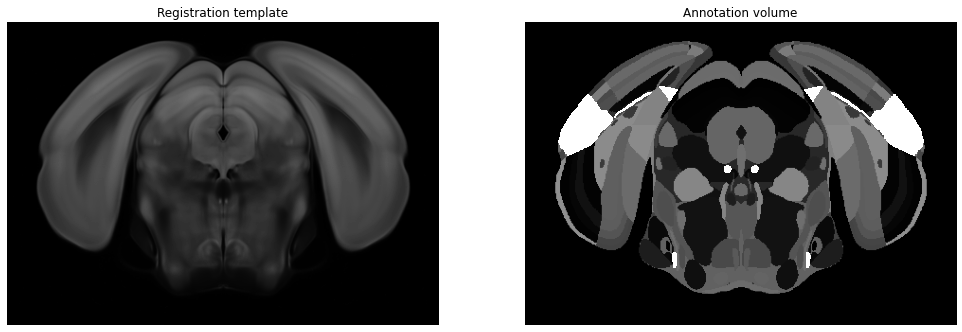

In [6]:
# Look at a slice from the average template and annotation volumes

# pick a slice to show
slice_idx = 380

f, ccf_axes = plt.subplots(1, 2, figsize=(17, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("Registration template")
ccf_axes[0].axis('off')

ccf_axes[1].imshow(annotation[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("Annotation volume")
ccf_axes[1].axis('off')

plt.show()

### Curate the annotation volume

The annotation volume contains IDs for all the structures at the deepest possible ontology level. 
We are however interested in a slightly coarse areal subdivision which is provided bt setID 167587189

In [7]:
chosenID = 167587189
structureList = tree.get_structures_by_set_id([chosenID])

structIds = np.array([struct['id'] for struct in structureList])
annotIds = np.unique(annotation)
annotIds = annotIds[annotIds!=0]  # Removes zero

commonIds = np.intersect1d(structIds,annotIds)

print(f'The selected set (id: {chosenID}) contains {len(structIds)} structures.')
print(f'The annotation volume contains {len(annotIds)} structures.')
print(f'The two sets have {len(commonIds)} structures in common.')

The selected set (id: 167587189) contains 316 structures.
The annotation volume contains 671 structures.
The two sets have 249 structures in common.


## Generate an updated annotation volume

**(Long processing time)**

Here we will create a copy of the annotation volume and we will curate it in order for it to contain only the ID's specified in the structureSet 167587189. To do this we will cycle thrpugh all the Id's in the annotation volume and substitute Id's that are too deep with the first ancerstor that is present in structureSet 167587189.  
Some border areas of the annotation volume have Id's of areas at a high ontology level (for example, there are many areas thoughout the brain of non-further specified *midbrain*). Since these un-assigned areas are dispersed throughout the brain and lack an ontological uniformity, we removed them by assigning Id=0.

In [8]:
# Copy of the whole annotation volume
updatedAnnot = np.copy(annotation)

# Utility function
any_in = lambda a, b: any(i in b for i in a)

present = 0
upstream = 0
downstream = 0
skipped = 0

# Check and update every individual id in the original annotation volume
for currId in annotIds:
    ancestors = tree.ancestor_ids([currId])[0]
    children = tree.child_ids([currId])[0]
    print(f'id:{currId}',end=' ')
    
    # If the current id is in the structure set already, skip it
    if currId in structIds:
        print(f'--  no change')
        present+=1
        continue
        
    # The current id is downstream to of one of the structures 
    # in the selected structure set
    elif any_in(ancestors,structIds):
        isMissing = True
        # get the first ancestor of the current id that's also 
        # present in the structure set
        newId = currId
        while isMissing:     
            newId = tree.parent_ids([newId])
            newId = newId[0]
            isMissing = newId not in structIds 
        updatedAnnot[updatedAnnot==currId] = newId
        print(f'--> {newId}')
        downstream+=1
        
    # The current id is upstream to of one of the structures 
    # in the selected structure set
    elif any_in(children,structIds):
        # These are portions of the brain non further annotated
        # e.g., non-annotated midbrain. Set to 0
        updatedAnnot[updatedAnnot==currId] = 0
        print(f'--> 0 (upstream) - {tree.get_structures_by_id([currId])[0]["name"]}')
        upstream+=1
        
    # Current id is in a separate tree from any structure in 
    # the selected structure set (e.g., retina, ventricular systems)
    else:
        updatedAnnot[updatedAnnot==currId] = 0
        print(f'--> 0 (different tree) - {tree.get_structures_by_id([currId])[0]["name"]}')
        skipped+=1
        

print(f'\nIds analyzed: {len(annotIds)}')
print(f'\t*present: {present} \n\t*upstream: {upstream} \n\t*downstream: {downstream} \n\t*skipped: {skipped}')

id:1 --  no change
id:2 --> 345
id:6 --> 1009
id:7 --  no change
id:9 --> 361
id:10 --> 294
id:12 --  no change
id:15 --  no change
id:17 --> 294
id:19 --  no change
id:20 --> 918
id:23 --  no change
id:26 --> 294
id:27 --  no change
id:28 --> 918
id:30 --  no change
id:33 --> 385
id:35 --  no change
id:36 --> 1057
id:38 --  no change
id:41 --> 533
id:42 --> 294
id:50 --> 795
id:52 --> 918
id:54 --> 1009
id:56 --  no change
id:58 --  no change
id:59 --  no change
id:62 --> 1009
id:63 --  no change
id:64 --  no change
id:66 --  no change
id:67 --> 795
id:68 --> 184
id:72 --  no change
id:74 --> 409
id:75 --  no change
id:78 --> 1009
id:81 --> 0 (different tree) - lateral ventricle
id:83 --  no change
id:84 --> 972
id:88 --  no change
id:91 --  no change
id:93 --> 1009
id:96 --  no change
id:97 --> 541
id:98 --> 0 (different tree) - subependymal zone
id:100 --  no change
id:101 --  no change
id:102 --> 1009
id:105 --> 398
id:106 --  no change
id:108 --> 0 (different tree) - choroid plexu

id:878 --> 345
id:880 --  no change
id:882 --> 985
id:884 --> 1009
id:888 --> 922
id:889 --> 353
id:893 --> 378
id:897 --> 677
id:898 --  no change
id:900 --> 1009
id:902 --> 425
id:903 --  no change
id:905 --> 402
id:906 --> 894
id:907 --  no change
id:908 --> 1009
id:910 --> 731
id:911 --> 1009
id:912 --  no change
id:914 --  no change
id:916 --> 1009
id:919 --> 39
id:924 --> 1009
id:927 --> 39
id:929 --> 353
id:930 --  no change
id:931 --  no change
id:935 --> 39
id:936 --  no change
id:939 --> 135
id:940 --> 1009
id:943 --> 985
id:944 --  no change
id:945 --> 369
id:946 --  no change
id:949 --> 1009
id:950 --> 345
id:951 --  no change
id:952 --  no change
id:954 --> 1002
id:955 --> 235
id:956 --> 1009
id:957 --  no change
id:959 --> 1018
id:961 --  no change
id:962 --> 993
id:963 --> 235
id:964 --> 1009
id:965 --> 894
id:966 --  no change
id:968 --  no change
id:969 --> 746
id:970 --  no change
id:971 --> 1009
id:973 --> 409
id:974 --> 345
id:975 --  no change
id:976 --> 920
id:977

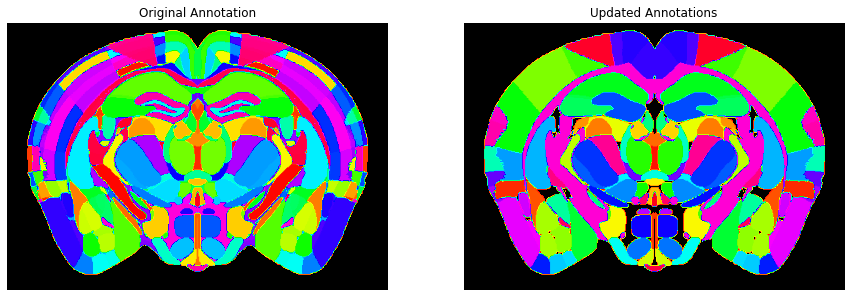

In [12]:
#  Create custom colormap for displaying accurately brain structures
from matplotlib import cm
from matplotlib.colors import ListedColormap

# Create the new colormap
# Modified version of HSV in which 0 (Id of unassigned structures) is represented by black
# so that the background of the brain appears black
n = 256
hsv = cm.get_cmap('hsv', n)
newcolors = hsv(np.linspace(0, 1, n))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black
newcmp = ListedColormap(newcolors)

# Utility function for plotting images better
def rescaleId(sliceImg):
    ids = np.unique(sliceImg)
    outputImg = np.copy(sliceImg)
    for i, ID in enumerate(ids):
        outputImg[outputImg==ID] = i
    return outputImg

# Image a single slice
slice_idx = 280
f, ccf_axes = plt.subplots(1, 2, figsize=(15, 6))
ccf_axes[0].imshow(rescaleId(annotation[slice_idx,:,:]), cmap=newcmp, aspect='equal')#, vmin=0, vmax=1000)
ccf_axes[0].set_title("Original Annotation")
ccf_axes[0].axis('off')

ccf_axes[1].imshow(rescaleId(updatedAnnot[slice_idx,:,:]), cmap=newcmp, aspect='equal')#, vmin=0, vmax=300)
ccf_axes[1].set_title("Updated Annotations")
ccf_axes[1].axis('off')

plt.show()



## Save the output files

Here we save the output of this analysis that needs to be used in the rest of the riffle shuffle pipeline.  
The outputs to be saved are:
- **Updated Annotation Volume** - The 3D annotation volume containing only the Id's specified in the structureSet 167587189
- **Id-Area map** - A .csv file containing the Id's of all the areas in the structureSet 167587189 and the respective names 

In [10]:
# Save the updated annotation volume as a tiff file
from tifffile import imsave

fileName = 'UpdatedAnnotationVolume.tif'
imsave(fileName, updatedAnnot)

In [13]:
# Save the Id-Area map as a .csv file
fileName = 'RegionIDs.csv'

# Create a dataframe
names= [tree.get_structures_by_id([areaId])[0]['name'] for areaId in structIds]
data = list(zip(structIds,names))
s = pd.DataFrame(data,columns=['id','name'])

# Save the dataframe to a .csv file
s.to_csv(fileName,index=False,header=False)